In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

### Load the data

In [3]:
data_directory='../data/processed'
file_name='Tuesday_processed.pkl'

data_file=os.path.join(data_directory,file_name)

In [4]:
df=pd.read_pickle(data_file)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,-0.640114,1.187431,0.696345,0.921777,0.534236,0.933384,-0.909253,0.711222,1.555992,...,-0.942508,-0.410787,-0.309783,-0.410781,-0.410656,-0.411264,-0.310487,-0.411264,-0.411264,BENIGN
1,88,-0.568854,1.354268,0.696345,1.062399,1.157706,1.095287,-0.909253,0.757813,1.575217,...,-0.942508,-0.410787,-0.309783,-0.410781,-0.410656,-0.411264,-0.310487,-0.411264,-0.411264,BENIGN
2,88,-0.508132,1.187431,0.696345,1.789269,1.146145,1.943099,-0.909253,2.495085,1.668802,...,-0.942508,-0.410787,-0.309783,-0.410781,-0.410656,-0.411264,-0.310487,-0.411264,-0.411264,BENIGN
3,88,-0.687351,1.187431,0.696345,0.933891,0.544090,0.947302,-0.909253,0.732452,1.558593,...,-0.942508,-0.410787,-0.309783,-0.410781,-0.410656,-0.411264,-0.310487,-0.411264,-0.411264,BENIGN
4,88,-0.600607,1.354268,0.696345,1.071451,1.157706,1.105734,-0.909253,0.773631,1.576929,...,-0.942508,-0.410787,-0.309783,-0.410781,-0.410656,-0.411264,-0.310487,-0.411264,-0.411264,BENIGN


## Preparing the Dataset for Dimensionality Reduction

Here we need to separate our class variable, which in our case is "Label" from the rest of the dataset.

Since Linear Discriminant Analysis (LDA) is a supervised form of dimensionality reduction, we will also need to feed labels into it.

For t-SNE, the unlabeled data will be sufficient.

In [5]:
y=np.array(df['Label'])
y

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [6]:
X=np.array(df.loc[:, df.columns != 'Label'])
X.shape

(445645, 67)

### 1. LDA based dimensionality reduction

See:https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis.fit_transform

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda_reducer = LinearDiscriminantAnalysis(n_components=2)
x_red_lda = lda_reducer.fit_transform(X,y)

C:\Users\emirk\Anaconda3\envs\insight\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


We see above that many of the features are collinear. This is something we have observed in the correlation matrix generated during the exploratory data analysis.

For the time being, we leave it as is.

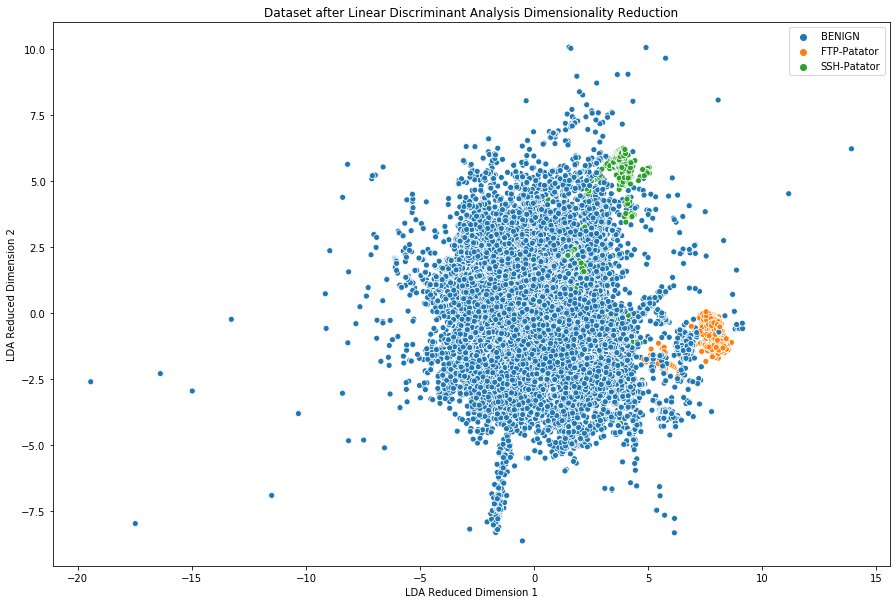

In [9]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(x_red_lda[:,0],x_red_lda[:,1],hue=y)
plt.xlabel('LDA Reduced Dimension 1')
plt.ylabel('LDA Reduced Dimension 2')
plt.title('Dataset after Linear Discriminant Analysis Dimensionality Reduction')
plt.show()

### 2. t-SNE based dimensionaliy reduction

See: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [10]:
from sklearn.manifold import TSNE

In [59]:
sample_size = 50000

X_small = df.loc[:, df.columns != 'Label'].sample(n=sample_size)
X_small.shape

(50000, 67)

In [60]:
perp_values_to_try=[5,10,20,30,40,50]

In [61]:
x_red_tsne=[]
for i, perp in enumerate(perp_values_to_try):
    x_red_tsne.append(TSNE(n_components=2,perplexity=perp).fit_transform(X_small))
    fig=plt.figure(figsize=(15,10))
    sns.scatterplot(x_red_tsne[i][:,0],x_red_tsne[i][:,1],hue=y[0:sample_size])
    plt.xlabel('t-SNE Reduced Dimension 1')
    plt.ylabel('t-SNE Reduced Dimension 2')
    plt.title('Dataset after t-SNE dataset size='+str(sample_size)+' perplexity='+str(perp))
    plt.savefig('./figures/TSNE/'+'sample_size_'+str(sample_size)+'_perplexity_'+str(perp)+'.png')
    plt.close(fig)

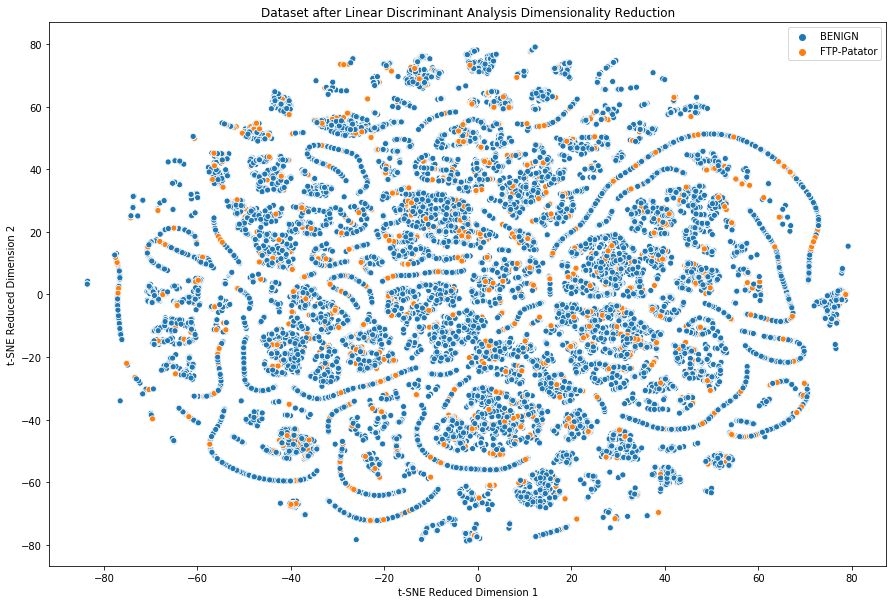

In [33]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(x_red_tsne[:,0],x_red_tsne[:,1],hue=y[0:50000])
plt.xlabel('t-SNE Reduced Dimension 1')
plt.ylabel('t-SNE Reduced Dimension 2')
plt.title('Dataset after Linear Discriminant Analysis Dimensionality Reduction')
plt.show()

### 3. Singular value decomposition (SVD) based dimensionaliy reduction

See: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html